In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("hw5.ipynb")

# CPSC 330 - Applied Machine Learning 

## Homework 5: Putting it all together 
### Associated lectures: All material till lecture 13 

**Due date: [Monday, Mar 10, 11:59 pm](https://github.com/UBC-CS/cpsc330-2024W2?tab=readme-ov-file#deliverable-due-dates-tentative)**

## Table of contents
0. [Submission instructions](#si)
1. [Understanding the problem](#1)
2. [Data splitting](#2)
3. [EDA](#3)
4. [Feature engineering](#4)
5. [Preprocessing and transformations](#5) 
6. [Baseline model](#6)
7. [Linear models](#7)
8. [Different models](#8)
9. [Feature selection](#9)
10. [Hyperparameter optimization](#10)
11. [Interpretation and feature importances](#11) 
12. [Results on the test set](#12)
13. [Summary of the results](#13)
14. [Your takeaway from the course](#15)

<div class="alert alert-info">

## Submission instructions
<hr>
rubric={points:4}

**You may work with a partner on this homework and submit your assignment as a group.** Below are some instructions on working as a group.  
- The maximum group size is 2. 
- Use group work as an opportunity to collaborate and learn new things from each other. 
- Be respectful to each other and make sure you understand all the concepts in the assignment well. 
- It's your responsibility to make sure that the assignment is submitted by one of the group members before the deadline. 
- You can find the instructions on how to do group submission on Gradescope [here](https://help.gradescope.com/article/m5qz2xsnjy-student-add-group-members).
- If you would like to use late tokens for the homework, all group members must have the necessary late tokens available. Please note that the late tokens will be counted for all members of the group.   


Follow the [homework submission instructions](https://github.com/UBC-CS/cpsc330-2024W2/blob/master/docs/homework_instructions.md). 

1. Before submitting the assignment, run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`. 
2. Notebooks with cell execution numbers out of order or not starting from "1" will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
3. Follow the [CPSC 330 homework instructions](https://ubc-cs.github.io/cpsc330-2024W2/docs/homework_instructions.html), which include information on how to do your assignment and how to submit your assignment.
4. Upload your solution on Gradescope. Check out this [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/) if you need help with Gradescope submission. 
5. Make sure that the plots and output are rendered properly in your submitted file. If the .ipynb file is too big and doesn't render on Gradescope, also upload a pdf or html in addition to the .ipynb so that the TAs can view your submission on Gradescope.


_Note: The assignments will get gradually more open-ended as we progress through the course. In many cases, there won't be a single correct solution. Sometimes you will have to make your own choices and your own decisions (for example, on what parameter values to use when they are not explicitly provided in the instructions). Use your own judgment in such cases and justify your choices, if necessary._

</div>

<!-- BEGIN QUESTION -->

## Imports

<div class="alert alert-warning">
    
Imports
    
</div>

_Points:_ 0

In [2]:
final_test_score = 0.5136868491166273 
#used with R²

<!-- END QUESTION -->

## Introduction <a name="in"></a>

In this homework you will be working on an open-ended mini-project, where you will put all the different things you have learned so far together to solve an interesting problem.

A few notes and tips when you work on this mini-project: 

#### Tips
1. This mini-project is open-ended, and while working on it, there might be some situations where you'll have to use your own judgment and make your own decisions (as you would be doing when you work as a data scientist). Make sure you explain your decisions whenever necessary. 
2. **Do not include everything you ever tried in your submission** -- it's fine just to have your final code. That said, your code should be reproducible and well-documented. For example, if you chose your hyperparameters based on some hyperparameter optimization experiment, you should leave in the code for that experiment so that someone else could re-run it and obtain the same hyperparameters, rather than mysteriously just setting the hyperparameters to some (carefully chosen) values in your code. 
3. If you realize that you are repeating a lot of code try to organize it in functions. Clear presentation of your code, experiments, and results is the key to be successful in this lab. You may use code from lecture notes or previous lab solutions with appropriate attributions. 

#### Assessment
We plan to grade fairly and leniently. We don't have some secret target score that you need to achieve to get a good grade. **You'll be assessed on demonstration of mastery of course topics, clear presentation, and the quality of your analysis and results.** For example, if you just have a bunch of code and no text or figures, that's not good. If you do a bunch of sane things and get a lower accuracy than your friend, don't sweat it.


#### A final note
Finally, this style of this "project" question is different from other assignments. It'll be up to you to decide when you're "done" -- in fact, this is one of the hardest parts of real projects. But please don't spend WAY too much time on this... perhaps "a few hours" (15-20 hours???) is a good guideline for this project . Of course if you're having fun you're welcome to spend as much time as you want! But, if so, try not to do it out of perfectionism or getting the best possible grade. Do it because you're learning and enjoying it. Students from the past cohorts have found such kind of labs useful and fun and I hope you enjoy it as well. 

<br><br>

<!-- BEGIN QUESTION -->

## 1. Pick your problem and explain the prediction problem <a name="1"></a>
<hr>
rubric={points:3}

In this mini project, you have the option to choose on which dataset you will be working on. The tasks you will need to carry on will be similar, independently of your choice.

### Option 1
You can choose to work on a classification problem of predicting whether a credit card client will default or not. 
For this problem, you will use [Default of Credit Card Clients Dataset](https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset). In this data set, there are 30,000 examples and 24 features, and the goal is to estimate whether a person will default (fail to pay) their credit card bills; this column is labeled "default.payment.next.month" in the data. The rest of the columns can be used as features. You may take some ideas and compare your results with [the associated research paper](https://www.sciencedirect.com/science/article/pii/S0957417407006719), which is available through [the UBC library](https://www.library.ubc.ca/). 


### Option 2
You can choose to work on a regression problem using a [dataset](https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data) of New York City Airbnb listings from 2019. As usual, you'll need to start by downloading the dataset, then you will try to predict `reviews_per_month`, as a proxy for the popularity of the listing. Airbnb could use this sort of model to predict how popular future listings might be before they are posted, perhaps to help guide hosts create more appealing listings. In reality they might instead use something like vacancy rate or average rating as their target, but we do not have that available here.

> Note there is an updated version of this dataset with more features available [here](http://insideairbnb.com/). The features were are using in `listings.csv.gz` for the New York city datasets. You will also see some other files like `reviews.csv.gz`. For your own interest you may want to explore the expanded dataset and try your analysis there. However, please submit your results on the dataset obtained from Kaggle.


**Your tasks:**

1. Spend some time understanding the options and pick the one you find more interesting (it may help spending some time looking at the documentation available on Kaggle for each dataset).
2. After making your choice, focus on understanding the problem and what each feature means, again using the documentation on the dataset page on Kaggle. Write a few sentences on your initial thoughts on the problem and the dataset. 
3. Download the dataset and read it as a pandas dataframe. 

<div class="alert alert-warning">
    
Solution_1
    
</div>

_Points:_ 3

I see that most of the listings are either in Manhattan or Brooklyn. I would assume that there is a relationship between the location and the price of the listings. I assume there would also be a strong relationship between the price and reviews_per_month(target). 

In [3]:

from hashlib import sha1
import seaborn as sns

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.rcParams["font.size"] = 16

from sklearn.dummy import DummyClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import (
    GridSearchCV,
    cross_val_score,
    cross_validate,
    train_test_split,
)
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.tree import DecisionTreeClassifier


ny_df = pd.read_csv("data/AB_NYC_2019.csv")
ny_df.head()
#remove the null values 
ny_df = ny_df.dropna()
ny_df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48782,36425863,Lovely Privet Bedroom with Privet Restroom,83554966,Rusaa,Manhattan,Upper East Side,40.78099,-73.95366,Private room,129,1,1,2019-07-07,1.00,1,147
48790,36427429,No.2 with queen size bed,257683179,H Ai,Queens,Flushing,40.75104,-73.81459,Private room,45,1,1,2019-07-07,1.00,6,339
48799,36438336,Seas The Moment,211644523,Ben,Staten Island,Great Kills,40.54179,-74.14275,Private room,235,1,1,2019-07-07,1.00,1,87
48805,36442252,1B-1B apartment near by Metro,273841667,Blaine,Bronx,Mott Haven,40.80787,-73.92400,Entire home/apt,100,1,2,2019-07-07,2.00,1,40


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 2. Data splitting <a name="2"></a>
<hr>
rubric={points:2}

**Your tasks:**

1. Split the data into train (70%) and test (30%) portions with `random_state=123`.

> If your computer cannot handle training on 70% training data, make the test split bigger.  

<div class="alert alert-warning">
    
Solution_2
    
</div>

_Points:_ 2

In [4]:
train_listings , test_listings = train_test_split(ny_df, test_size = 0.3,random_state =123)



<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 3. EDA <a name="3"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Perform exploratory data analysis on the train set.
2. Include at least two summary statistics and two visualizations that you find useful, and accompany each one with a sentence explaining it.
3. Summarize your initial observations about the data. 
4. Pick appropriate metric/metrics for assessment. 

<div class="alert alert-warning">
    
Solution_3
    
</div>

_Points:_ 10

The average price is 151.52 dollars and the standard deviation is 236.62.

The mean for minimum nights is 7 but this median is 1.



In [5]:
train_listings.info()
# train_listings.isnull().sum()


train_listings.describe()



<class 'pandas.core.frame.DataFrame'>
Index: 27174 entries, 19760 to 18958
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              27174 non-null  int64  
 1   name                            27174 non-null  object 
 2   host_id                         27174 non-null  int64  
 3   host_name                       27174 non-null  object 
 4   neighbourhood_group             27174 non-null  object 
 5   neighbourhood                   27174 non-null  object 
 6   latitude                        27174 non-null  float64
 7   longitude                       27174 non-null  float64
 8   room_type                       27174 non-null  object 
 9   price                           27174 non-null  int64  
 10  minimum_nights                  27174 non-null  int64  
 11  number_of_reviews               27174 non-null  int64  
 12  last_review                     2

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,2.717400e+04,2.717400e+04,27174.000000,27174.000000,27174.000000,27174.000000,27174.000000,27174.000000,27174.000000,27174.000000
mean,1.799330e+07,6.353404e+07,40.728312,-73.951366,142.572054,5.978950,29.492714,1.372901,5.148672,114.698867
std,1.072544e+07,7.550212e+07,0.055030,0.046505,197.372055,19.249904,48.617350,1.670782,26.179356,129.534040
min,2.539000e+03,2.438000e+03,40.506410,-74.244420,0.000000,1.000000,1.000000,0.010000,1.000000,0.000000
25%,8.559726e+06,6.878163e+06,40.688640,-73.982420,69.000000,1.000000,3.000000,0.190000,1.000000,0.000000
50%,1.872288e+07,2.797422e+07,40.721750,-73.955020,102.000000,2.000000,9.000000,0.710000,1.000000,55.000000
75%,2.751905e+07,9.942811e+07,40.763100,-73.935640,170.000000,4.000000,34.000000,2.000000,2.000000,229.000000
max,3.645581e+07,2.738417e+08,40.913060,-73.719280,10000.000000,1250.000000,629.000000,27.950000,327.000000,365.000000


Text(0.5, 1.0, 'Correlation Heatmap of Numerical Features')

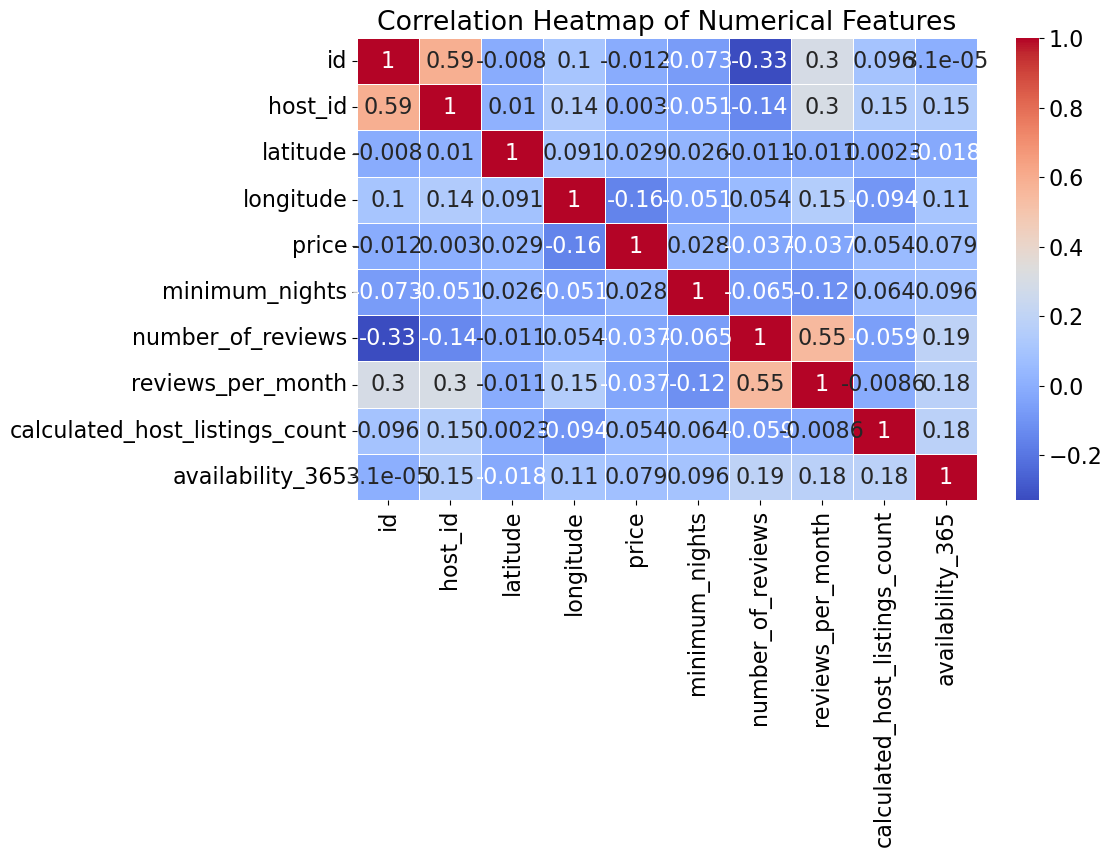

In [6]:
# //visualizationss 

correlation_matrix = train_listings.corr(numeric_only=True)
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")


We can see that there is a positive relationship between number of reviews and reviews_per_month, so it could be used as a potential feature for our model.

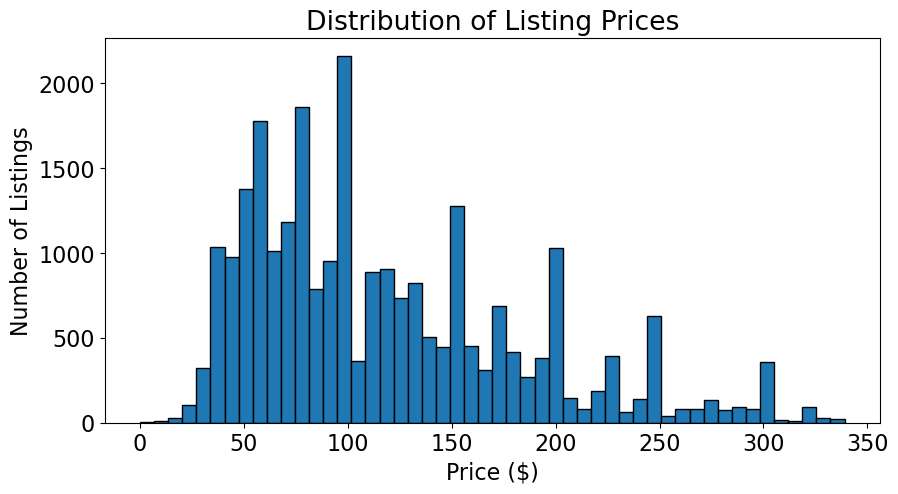

In [7]:
plt.figure(figsize=(10, 5))
plt.hist(train_listings['price'], bins=50, edgecolor='black', range=(0, train_listings['price'].quantile(0.95)))  # Exclude extreme outliers
plt.xlabel("Price ($)")
plt.ylabel("Number of Listings")
plt.title("Distribution of Listing Prices")
plt.show()

We see most listings are affordable, with a few expensive outliers. Graph is right skewed.

In [8]:
...

Ellipsis

In [9]:
...

Ellipsis

In [10]:
...

Ellipsis

In [11]:
...

Ellipsis

In [12]:
...

Ellipsis

In [13]:
...

Ellipsis

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 4. Feature engineering <a name="4"></a>
<hr>
rubric={points:1}

**Your tasks:**

1. Carry out feature engineering. In other words, extract new features relevant for the problem and work with your new feature set in the following exercises. You may have to go back and forth between feature engineering and preprocessing. 

<div class="alert alert-warning">
    
Solution_4
    
</div>

_Points:_ 1

In [14]:
# make column for price per night
train_listings['price_per_night'] = train_listings['price'] / train_listings['minimum_nights']
train_listings['price_per_night'] = train_listings['price_per_night'].replace([np.inf, -np.inf], np.nan).fillna(0)

test_listings['price_per_night'] = test_listings['price'] / test_listings['minimum_nights']
test_listings['price_per_night'] = test_listings['price_per_night'].replace([np.inf, -np.inf], np.nan).fillna(0)


train_listings

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,price_per_night
19760,15819665,Charming 2BR--20 min to Manhattan,30593595,Dorion,Brooklyn,Bushwick,40.68442,-73.90830,Entire home/apt,99,3,126,2019-07-03,3.93,1,46,33.000000
27021,21386105,Quiet & clean 1br haven with balcony near the ...,154256662,Danielle,Queens,Astoria,40.77134,-73.92424,Entire home/apt,250,3,1,2018-01-02,0.05,1,180,83.333333
14985,11928713,Sunny living room and great location in Brooklyn,3274929,Agustin,Brooklyn,Flatbush,40.63549,-73.95817,Shared room,38,3,27,2019-04-24,0.95,1,84,12.666667
1310,573612,"Sunny Private Bedroom by Express Train, Colleges!",2270624,Ny,Manhattan,Harlem,40.81199,-73.95116,Private room,79,1,132,2019-06-16,1.56,2,335,79.000000
46939,35496676,Cozy Private Bedroom in Upper West Side,266522456,Aaron,Manhattan,Upper West Side,40.80140,-73.96563,Private room,130,1,9,2019-07-07,9.00,3,79,130.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8858,6792888,ONE BR SUNNY APT-15 MIN FROM TIMESQ,35340889,Uros,Queens,Sunnyside,40.74589,-73.91956,Entire home/apt,89,5,4,2015-10-09,0.09,1,0,17.800000
18576,14672067,Cozy spacious Brooklyn apartment!,89532341,Safiyah,Brooklyn,East Flatbush,40.64530,-73.94669,Entire home/apt,85,93,19,2017-05-21,0.54,1,89,0.913978
21345,17000577,Charming Brooklyn Heights Abode,113924874,Michi,Brooklyn,Brooklyn Heights,40.70081,-73.99503,Entire home/apt,107,25,12,2019-05-01,0.42,1,1,4.280000
33493,26487039,Brooklyn Loft - close to Pratt!!! Great location!,56666937,Brittany,Brooklyn,Clinton Hill,40.68962,-73.96062,Entire home/apt,150,6,16,2019-06-20,1.58,1,168,25.000000


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 5. Preprocessing and transformations <a name="5"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Identify different feature types and the transformations you would apply on each feature type. 
2. Define a column transformer, if necessary. 

<div class="alert alert-warning">
    
Solution_5
    
</div>

_Points:_ 10

In [15]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

# we will drop the columns not being used

numerical_features = ['price', 'minimum_nights', 'number_of_reviews', 
                      'calculated_host_listings_count', 'availability_365', 'price_per_night']
categorical_features_onehot = ['neighbourhood_group']
categorical_features_ordinal = ['room_type']
room_type_categories = [['Shared room', 'Private room', 'Entire home/apt']]
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('onehot', OneHotEncoder(handle_unknown='ignore'), categorical_features_onehot),
        ('ordinal', OrdinalEncoder(categories=room_type_categories), categorical_features_ordinal)
    ]
)
preprocessor

ColumnTransformer(transformers=[('num', StandardScaler(),
                                 ['price', 'minimum_nights',
                                  'number_of_reviews',
                                  'calculated_host_listings_count',
                                  'availability_365', 'price_per_night']),
                                ('onehot',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['neighbourhood_group']),
                                ('ordinal',
                                 OrdinalEncoder(categories=[['Shared room',
                                                             'Private room',
                                                             'Entire '
                                                             'home/apt']]),
                                 ['room_type'])])

In [16]:
df_train_transformed = preprocessor.fit_transform(train_listings)
df_test_transformed = preprocessor.transform(test_listings)

if hasattr(df_train_transformed, "toarray"):
    df_train_transformed = df_train_transformed.toarray()
    df_test_transformed = df_test_transformed.toarray()

onehot_feature_names = preprocessor.named_transformers_['onehot'].get_feature_names_out(categorical_features_onehot)
transformed_columns = numerical_features + list(onehot_feature_names) + categorical_features_ordinal

df_train_transformed = pd.DataFrame(df_train_transformed, columns=transformed_columns)
df_test_transformed = pd.DataFrame(df_test_transformed, columns=transformed_columns)
df_train_transformed

,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,price_per_night,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type
0,-0.220765,-0.154754,1.985075,-0.158474,-0.530364,-0.286191,0.0,1.0,0.0,0.0,0.0,2.0
1,0.544302,-0.154754,-0.586071,-0.158474,0.504133,0.152151,0.0,0.0,0.0,1.0,0.0,2.0
2,-0.529832,-0.154754,-0.051273,-0.158474,-0.236999,-0.463270,0.0,1.0,0.0,0.0,0.0,0.0
3,-0.322098,-0.258653,2.108490,-0.120275,1.700751,0.114413,0.0,0.0,1.0,0.0,0.0,1.0
4,-0.063698,-0.258653,-0.421518,-0.082077,-0.275600,0.558560,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
27169,-0.271432,-0.050856,-0.524364,-0.158474,-0.885489,-0.418565,0.0,0.0,0.0,1.0,0.0,2.0
27170,-0.291698,4.520680,-0.215826,-0.158474,-0.198398,-0.565621,0.0,1.0,0.0,0.0,0.0,2.0
27171,-0.180232,0.988130,-0.359811,-0.158474,-0.877769,-0.536307,0.0,1.0,0.0,0.0,0.0,2.0
27172,0.037635,0.001094,-0.277534,-0.158474,0.411491,-0.355862,0.0,1.0,0.0,0.0,0.0,2.0


In [17]:
...

Ellipsis

In [18]:
...

Ellipsis

In [19]:
...

Ellipsis

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 6. Baseline model <a name="6"></a>
<hr>
rubric={points:2}

**Your tasks:**
1. Try `scikit-learn`'s baseline model and report results.

<div class="alert alert-warning">
    
Solution_6
    
</div>

_Points:_ 2

In [20]:
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score



target = "reviews_per_month"

X_train = df_train_transformed 
X_test = df_test_transformed  
y_train = train_listings[target] 
y_test = test_listings[target] 

baseline_model = DummyRegressor()
bbaseline_model = DummyRegressor(strategy="mean") 
baseline_model.fit(X_train, y_train)


cv_results = cross_validate(baseline_model, X_train, y_train, cv=10, return_train_score=True)
cv_df = pd.DataFrame(cv_results)

cv_df


,fit_time,score_time,test_score,train_score
0,0.003082,0.001001,-0.002092,0.0
1,0.002004,0.000996,-0.000333,0.0
2,0.002000,0.001507,-0.000009,0.0
3,0.002014,0.000504,-0.000267,0.0
4,0.001995,0.001001,-0.000433,0.0
5,0.001513,0.000998,-0.000111,0.0
6,0.002000,0.001000,-0.001815,0.0
7,0.002509,0.000000,-0.000023,0.0
8,0.001943,0.001011,-0.000105,0.0
9,0.001998,0.000999,-0.000026,0.0


In [21]:
cv_df["test_score"].mean()

np.float64(-0.0005214209831736483)

In [22]:
...

Ellipsis

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 7. Linear models <a name="7"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Try a linear model as a first real attempt. 
2. Carry out hyperparameter tuning to explore different values for the complexity hyperparameter. 
3. Report cross-validation scores along with standard deviation. 
4. Summarize your results.

<div class="alert alert-warning">
    
Solution_7
    
</div>

_Points:_ 10

We see that the best value of alpha is 100 and our mean validation score is 0.356 and standard deviation of 0.017 which is better than our dummy regressor which had validations score in the negatives.

In [23]:
from sklearn.linear_model import Ridge


ridge_model = Ridge()

param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}

grid_search = GridSearchCV(ridge_model, param_grid, cv=10, scoring='r2', return_train_score=True)
grid_search.fit(X_train, y_train)
best_ridge_model = grid_search.best_estimator_
best_alpha = grid_search.best_params_['alpha']

cv_results = cross_validate(best_ridge_model, X_train, y_train, cv=10, return_train_score=True, 
                            scoring='r2')
cv_df = pd.DataFrame(cv_results)


cv_df

summary_results = {
    'Best Alpha': best_alpha,
    'Mean R²': cv_df['test_score'].mean(),
    'Std R²': cv_df['test_score'].std()
}
summary_results

cv_df

,fit_time,score_time,test_score,train_score
0,0.005009,0.001991,0.306617,0.338697
1,0.006510,0.001998,0.313870,0.338186
2,0.006181,0.002036,0.332413,0.335983
3,0.006005,0.002000,0.357687,0.333299
4,0.007000,0.002001,0.347461,0.334115
5,0.006012,0.002455,0.331874,0.335841
6,0.006009,0.001990,0.321224,0.337047
7,0.007001,0.001000,0.336149,0.335323
8,0.006001,0.002005,0.344512,0.334670
9,0.006000,0.002000,0.345475,0.334528


In [24]:
summary_results

{'Best Alpha': 100,
 'Mean R²': np.float64(0.333728173924846),
 'Std R²': np.float64(0.016033554525921864)}

In [25]:
...

Ellipsis

In [26]:
...

Ellipsis

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 8. Different models <a name="8"></a>
<hr>
rubric={points:12}

**Your tasks:**
1. Try at least 3 other models aside from a linear model. One of these models should be a tree-based ensemble model. 
2. Summarize your results in terms of overfitting/underfitting and fit and score times. Can you beat a linear model? 

<div class="alert alert-warning">
    
Solution_8
    
</div>

_Points:_ 12

Our models do perform better than linear models. The random forest regressor seems to be overfitting as there is a big difference between test and train scores.

In [27]:
from lightgbm import LGBMRegressor

lgbm_model = LGBMRegressor(n_estimators=50, random_state=123)

cv_results_lgbm = cross_validate(lgbm_model, X_train, y_train, cv=10, return_train_score=True)

cv_df_lgbm = pd.DataFrame(cv_results_lgbm)

print(cv_df_lgbm)

cv_df_lgbm["test_score"].mean()

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000200 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1127
[LightGBM] [Info] Number of data points in the train set: 24456, number of used features: 12
[LightGBM] [Info] Start training from score 1.365043
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000482 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1128
[LightGBM] [Info] Number of data points in the train set: 24456, number of used features: 12
[LightGBM] [Info] Start training from score 1.369735
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [

np.float64(0.5347196649808221)

In [28]:
from sklearn.ensemble import RandomForestRegressor

rf_regressor = RandomForestRegressor(n_estimators=100, random_state=123, n_jobs=-1)

cv_results_rf = cross_validate(rf_regressor, X_train, y_train, cv=10, return_train_score=True)

cv_df_rf = pd.DataFrame(cv_results_rf)

print(cv_df_rf)
cv_df_rf['test_score'].mean()

   fit_time  score_time  test_score  train_score
0  1.037811    0.158064    0.538191     0.928319
1  0.991550    0.042359    0.481523     0.928881
2  1.027803    0.044898    0.498910     0.928043
3  1.073958    0.046253    0.515962     0.928024
4  1.022966    0.043379    0.488746     0.929117
5  0.951870    0.043036    0.498909     0.927776
6  0.983629    0.055158    0.481422     0.928415
7  0.982395    0.043044    0.515525     0.928362
8  0.957420    0.043453    0.500654     0.928271
9  0.985170    0.041365    0.516626     0.928409


np.float64(0.5036467288682919)

In [29]:
# this was blocking the kernel (i could not understand why)
# from sklearn.svm import SVR


# from sklearn.ensemble import VotingRegressor

# averaging_regressor = VotingRegressor(estimators=[
#     ("Random Forest", RandomForestRegressor(n_estimators=20, random_state=123, n_jobs=-1)),
#     ("SVR", SVR())
# ])
# cv_results_avg = cross_validate(averaging_regressor, X_train, y_train, cv=5, return_train_score=True)

# cv_df_avg = pd.DataFrame(cv_results_avg)
# cv_df_avg


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 9. Feature selection <a name="9"></a>
<hr>
rubric={points:2}

**Your tasks:**

Make some attempts to select relevant features. You may try `RFECV` or forward selection for this. Do the results improve with feature selection? Summarize your results. If you see improvements in the results, keep feature selection in your pipeline. If not, you may abandon it in the next exercises. 

<div class="alert alert-warning">
    
Solution_9
    
</div>

_Points:_ 2

there is no improvement in the scores, so we will not use it.

In [30]:

from sklearn.feature_selection import RFECV
from sklearn.linear_model import Ridge

ridge_fs = Ridge(alpha=100.0)

rfecv = RFECV(estimator=ridge_fs, step=1, cv=5, scoring='r2', n_jobs=-1)

rfecv.fit(X_train, y_train)

selected_features = X_train.columns[rfecv.support_]

X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

selected_features.tolist()


['price',
 'minimum_nights',
 'number_of_reviews',
 'calculated_host_listings_count',
 'availability_365',
 'price_per_night',
 'neighbourhood_group_Bronx',
 'neighbourhood_group_Brooklyn',
 'neighbourhood_group_Manhattan',
 'neighbourhood_group_Queens',
 'neighbourhood_group_Staten Island',
 'room_type']

In [31]:
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

ridge_model_selected = Ridge(alpha=100.0)
cv_results_selected = cross_validate(ridge_model_selected, X_train_selected, y_train, cv=5, scoring='r2', return_train_score=True)
cv_df_selected = pd.DataFrame(cv_results_selected)
cv_df_selected


,fit_time,score_time,test_score,train_score
0,0.008256,0.002120,0.309222,0.342056
1,0.006856,0.003099,0.344550,0.333372
2,0.004999,0.002002,0.340505,0.334082
3,0.004577,0.002011,0.330355,0.336703
4,0.005001,0.002172,0.344963,0.333273


In [32]:
summary_results = {
    'Mean R²': cv_df_selected['test_score'].mean(),
    'Std R²': cv_df_selected['test_score'].std()
}
summary_results

{'Mean R²': np.float64(0.33391889609911096),
 'Std R²': np.float64(0.015008328398153678)}

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 10. Hyperparameter optimization <a name="10"></a>
<hr>
rubric={points:10}

**Your tasks:**

Make some attempts to optimize hyperparameters for the models you've tried and summarize your results. In at least one case you should be optimizing multiple hyperparameters for a single model. You may use `sklearn`'s methods for hyperparameter optimization or fancier Bayesian optimization methods. 
  - [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)   
  - [RandomizedSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)
  - [scikit-optimize](https://github.com/scikit-optimize/scikit-optimize) 

<div class="alert alert-warning">
    
Solution_10
    
</div>

_Points:_ 10

Tree based models performed better than our linear models. alpha is high so it can result in underfitting. The max depth in both tree models was 10 which helped prevent overfitting. 

In [33]:
from sklearn.model_selection import GridSearchCV

ridge_param_grid = {
    "alpha": [0.01, 0.1, 1, 10, 100]
}

ridge_grid_search = GridSearchCV(Ridge(), ridge_param_grid, cv=5, scoring='r2', n_jobs=-1)
ridge_grid_search.fit(X_train_selected, y_train)

print(ridge_grid_search.best_params_)
ridge_grid_search.best_score_


{'alpha': 100}


np.float64(0.33391889609911096)

In [34]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
rf_param_grid = {
    "n_estimators": [10, 50, 100, 200],
    "max_depth": [5, 10, 20, None]
}

rf_random_search = RandomizedSearchCV(RandomForestRegressor(random_state=123), rf_param_grid, 
                                      n_iter=10, cv=5, scoring='r2', n_jobs=-1, random_state=123)
rf_random_search.fit(X_train_selected, y_train)

print(rf_random_search.best_params_)
print( rf_random_search.best_score_)


{'n_estimators': 200, 'max_depth': 10}
0.5190925360332005


In [35]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 10, None],
}

grid_search = GridSearchCV(
    LGBMRegressor(random_state=123), param_grid, 
    cv=5, scoring='r2', n_jobs=-1, verbose=1
)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print( best_params)
print( best_score)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000278 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1128
[LightGBM] [Info] Number of data points in the train set: 27174, number of used features: 12
[LightGBM] [Info] Start training from score 1.372901
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
{'max_depth': 10, 'n_estimators': 100}
0.5364765057377548


In [36]:
...

Ellipsis

In [37]:
...

Ellipsis

In [38]:
...

Ellipsis

In [39]:
...

Ellipsis

In [40]:
...

Ellipsis

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 11. Interpretation and feature importances <a name="1"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Use the methods we saw in class (e.g., `shap`) (or any other methods of your choice) to examine the most important features of one of the non-linear models. 
2. Summarize your observations. 

<div class="alert alert-warning">
    
Solution_11
    
</div>

_Points:_ 10

We see that number of reviews and availability are the most important features, and this also makes sense logically. More reviews per month would correspond to total number of reviews and also the availability throughout the year

In [41]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
import numpy as np

rf_model = RandomForestRegressor(n_estimators=100, random_state=123, n_jobs=-1)
rf_model.fit(X_train_selected, y_train)

feature_importances = rf_model.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': X_train_selected.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

feature_importance_df

,Feature,Importance
2,number_of_reviews,0.427118
4,availability_365,0.206768
1,minimum_nights,0.107347
5,price_per_night,0.075949
0,price,0.075117
3,calculated_host_listings_count,0.043737
9,neighbourhood_group_Queens,0.019175
11,room_type,0.015652
7,neighbourhood_group_Brooklyn,0.012062
8,neighbourhood_group_Manhattan,0.011197


In [42]:
...

Ellipsis

In [43]:
...

Ellipsis

In [44]:
...

Ellipsis

In [45]:
...

Ellipsis

In [46]:
...

Ellipsis

In [47]:
...

Ellipsis

In [48]:
...

Ellipsis

In [49]:
...

Ellipsis

In [50]:
...

Ellipsis

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 12. Results on the test set <a name="12"></a>
<hr>

rubric={points:10}

**Your tasks:**

1. Try your best performing model on the test data and report test scores. 
2. Do the test scores agree with the validation scores from before? To what extent do you trust your results? Do you think you've had issues with optimization bias? 
3. Take one or two test predictions and explain these individual predictions (e.g., with SHAP force plots).  

<div class="alert alert-warning">
    
Solution_12
    
</div>

_Points:_ 10

The test results do agree with the validation score. There is little difference between the test, train and validation scores, so i dont think there is optimization bias. 
We can also see that the model predicts 1.824 when the actual value was 4.67.

In [51]:
lgbm_best = LGBMRegressor(max_depth=10, n_estimators=100, random_state=123)

lgbm_best.fit(X_train, y_train)

y_pred_test = lgbm_best.predict(X_test)
test_r2 = r2_score(y_test, y_pred_test)
test_r2

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000287 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1128
[LightGBM] [Info] Number of data points in the train set: 27174, number of used features: 12
[LightGBM] [Info] Start training from score 1.372901
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


0.5136868491166273

In [52]:
actual_value = y_test.iloc[0]
actual_value

np.float64(4.67)

In [53]:
test_instance = X_test.iloc[0:1]
predicted_value = lgbm_best.predict(test_instance)[0]
predicted_value


np.float64(1.8245189231190275)

In [54]:
...

Ellipsis

In [55]:
...

Ellipsis

In [56]:
...

Ellipsis

In [57]:
...

Ellipsis

In [58]:
...

Ellipsis

In [59]:
...

Ellipsis

In [60]:
...

Ellipsis

In [61]:
...

Ellipsis

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 13. Summary of results <a name="13"></a>
<hr>
rubric={points:12}

Imagine that you want to present the summary of these results to your boss and co-workers. 

**Your tasks:**

1. Create a table summarizing important results. 
2. Write concluding remarks.
3. Discuss other ideas that you did not try but could potentially improve the performance/interpretability . 
3. Report your final test score along with the metric you used at the top of this notebook in the [Submission instructions section](#si).

<div class="alert alert-warning">
    
Solution_13
    
</div>

_Points:_ 12

We got the highest r^2 with lightGBM which is why we used it. All the models perform better than the baseline.
I could have used an averaging or stacking model with multiple models to maybe improve performance.

In [62]:
summary_results = pd.DataFrame({
    "Model": ["Baseline (Dummy Regressor)", "Ridge Regression", "Random Forest", "LightGBM "],
    "Validation R²": [-0.000521, 0.33372, 0.50364, 0.5347],  
})
summary_results

,Model,Validation R²
0,Baseline (Dummy Regressor),-0.000521
1,Ridge Regression,0.333720
2,Random Forest,0.503640
3,LightGBM,0.534700


In [63]:
...

Ellipsis

<!-- END QUESTION -->

<br><br>

<br><br>

<!-- BEGIN QUESTION -->

## 14. Your takeaway <a name="15"></a>
<hr>
rubric={points:2}

**Your tasks:**

What is your biggest takeaway from the supervised machine learning material we have learned so far? Please write thoughtful answers.  

<div class="alert alert-warning">
    
Solution_14
    
</div>

_Points:_ 2

Using more complex model does not guarantee better test scores. It also makes our model less interpretable while simple models may not give the best scores, they are more interpretable.

<!-- END QUESTION -->

<br><br>

**PLEASE READ BEFORE YOU SUBMIT:** 

When you are ready to submit your assignment do the following:

1. Run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`. 
2. Notebooks with cell execution numbers out of order or not starting from "1" will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
4. Upload the assignment using Gradescope's drag and drop tool. Check out this [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/) if you need help with Gradescope submission. 
5. Make sure that the plots and output are rendered properly in your submitted file. If the .ipynb file is too big and doesn't render on Gradescope, also upload a pdf or html in addition to the .ipynb so that the TAs can view your submission on Gradescope. 

This was a tricky one but you did it! 

![](img/eva-well-done.png)